16.512, Homework 6, Johannes Norheim, due 11/14

This pset was written in a jupyter notebooks, and has been uploaded online to https://github.com/norheim/rocketscience/blob/master/hw6.ipynb

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

We will apply the methodology outlined in the notes:

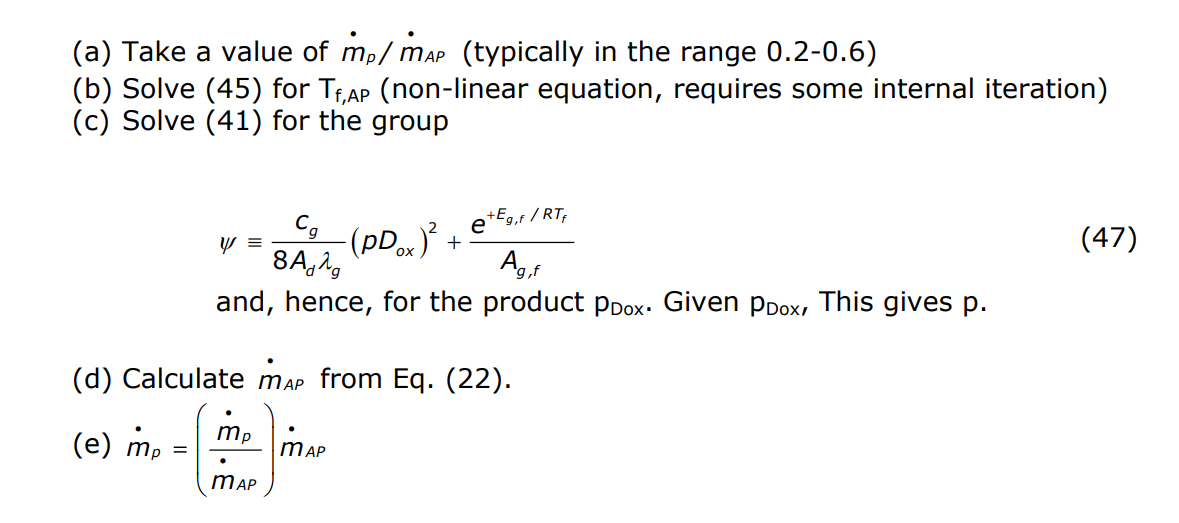

We will pick a larger range than 0.2 to 0.6 for the mass flow ratios (RM), and tune these parameters to get the right pDox values as requested in the pset: 

50 < pDox < 10,000 (atm x $\mu m$)

From an iterative process it was found that this is satisfied(within reasonable precison) for  0.078 < RM < 0.7845

In [2]:
RM = np.linspace(0.078,0.7845,100) #tuned mass flow ratios
alpha_AP = 0.8 # propellant composition: 80% mass ratio for AP

## (b) Solve for $T_{f,AP}$

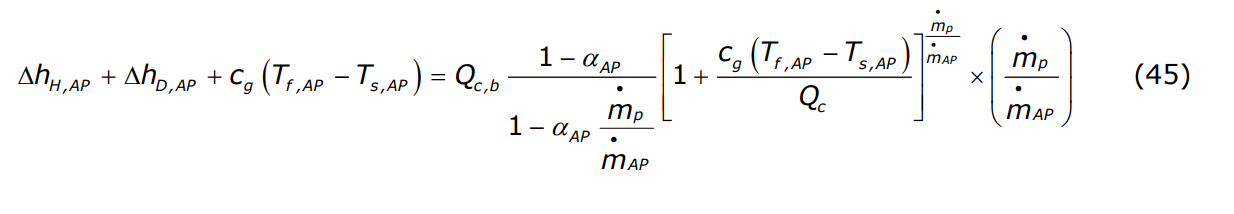

In [3]:
c_g = 0.3 #cal/g/K
#T_f_AP = 1205. #K
T_s_AP = 925. #K
T_s_b = 1100. #K
Q_c_b = 675. #cal/g
Q_c = lambda T_s_AP: 0.328*T_s_AP-123 #cal/g
dh_H_AP = lambda T_s_AP: 266 + 0.325*(T_s_AP-835) #cal/g
dh_D_AP = -375. #cal/g

In [4]:
left_side_eq = lambda T_f_AP, RM: dh_H_AP(T_s_AP) + dh_D_AP + c_g*(T_f_AP-T_s_AP)

In [5]:
right_side_eq1 = Q_c_b*(1-alpha_AP)/(1-alpha_AP*RM)
right_side_eq2 = lambda T_f_AP, RM: (1+c_g*(T_f_AP-T_s_AP)/Q_c(T_s_AP))**(RM)
right_side_eq = lambda T_f_AP, RM: right_side_eq1*right_side_eq2(T_f_AP, RM)*RM

In [6]:
@np.vectorize
def T_f_AP(RM):
    return fsolve(lambda T_f_AP: left_side_eq(T_f_AP, RM)-right_side_eq(T_f_AP, RM), 1100)[0]

In [7]:
T_f_AP(0.2)

array(1296.5177932365164)

### Calculate $T_f$
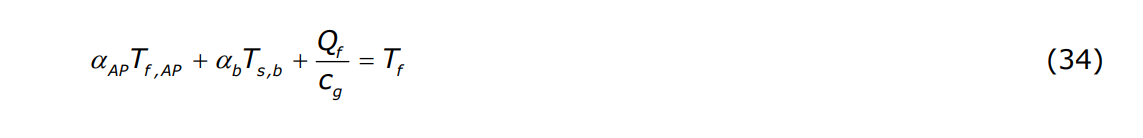

In [8]:
Q_f = 700 #cal/g
T_f = alpha_AP*T_f_AP(RM)+(1-alpha_AP)*T_s_b + Q_f/c_g

In [9]:
T_f

array([ 3536.9212981 ,  3539.86083287,  3542.82145258,  3545.8037897 ,
        3548.8084892 ,  3551.83620918,  3554.88762146,  3557.96341221,
        3561.06428263,  3564.19094958,  3567.3441463 ,  3570.52462314,
        3573.73314832,  3576.97050871,  3580.23751063,  3583.53498074,
        3586.86376688,  3590.22473903,  3593.61879029,  3597.04683781,
        3600.50982396,  3604.00871732,  3607.54451391,  3611.11823837,
        3614.73094521,  3618.38372016,  3622.07768156,  3625.81398179,
        3629.59380886,  3633.41838795,  3637.28898314,  3641.20689922,
        3645.1734835 ,  3649.19012783,  3653.25827067,  3657.37939929,
        3661.55505207,  3665.78682094,  3670.07635401,  3674.42535824,
        3678.83560234,  3683.30891986,  3687.8472124 ,  3692.45245301,
        3697.12668988,  3701.87205018,  3706.69074413,  3711.58506938,
        3716.55741562,  3721.61026953,  3726.74622   ,  3731.96796371,
        3737.27831112,  3742.68019281,  3748.17666624,  3753.77092309,
      

## (c) Solve for $\psi = \frac{c_g}{8A_d\lambda_g}(pD_{ox})^2+\frac{e^{\frac{E_{g,f}}{RT_f}}}{A_{g,f}}$

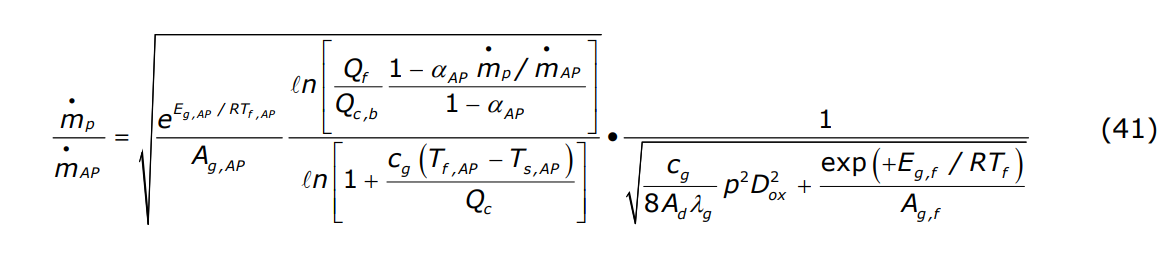

In [10]:
Q_f = 700. #cal/g
A_g_AP = 650. #g/cm3/sec/atm2
E_g_AP = 15000. #cal/mol

In [11]:
R = 82.057 #cm3*atm/(K*mol)

In [12]:
top2 = np.log(Q_f/Q_c_b*(1-alpha_AP*RM)/(1-alpha_AP))
bot2 = lambda T_s_AP: np.log(1+c_g*(T_f_AP(RM)-T_s_AP)/Q_c(T_s_AP))

In [13]:
psi = np.exp(E_g_AP/(R*T_f_AP(RM)))/A_g_AP*top2/bot2(T_s_AP)*(1./RM**2)

In [14]:
psi

array([ 1.13252604,  0.9372682 ,  0.78671139,  0.66832547,  0.57366324,
        0.49686537,  0.43376639,  0.38134085,  0.33734944,  0.30010681,
        0.26832544,  0.24100843,  0.21737452,  0.19680466,  0.17880341,
        0.16297057,  0.14898015,  0.13656452,  0.12550242,  0.11560964,
        0.10673188,  0.09873917,  0.09152141,  0.08498487,  0.07904935,
        0.07364596,  0.06871524,  0.06420568,  0.0600725 ,  0.05627658,
        0.05278371,  0.04956379,  0.04659033,  0.0438399 ,  0.04129174,
        0.0389274 ,  0.03673045,  0.0346862 ,  0.03278153,  0.03100465,
        0.02934495,  0.02779291,  0.0263399 ,  0.02497813,  0.02370055,
        0.02250075,  0.0213729 ,  0.02031172,  0.01931235,  0.01837038,
        0.01748179,  0.01664285,  0.01585019,  0.01510068,  0.01439146,
        0.01371989,  0.01308353,  0.01248014,  0.01190765,  0.01136413,
        0.01084781,  0.01035703,  0.00989028,  0.00944614,  0.00902327,
        0.00862046,  0.00823656,  0.00787051,  0.00752131,  0.00

## Solve for $pD_{ox}$
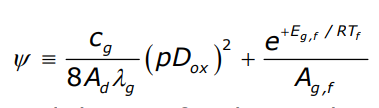

In [15]:
A_g_f = 650. #g.cm3/sec/atm2
E_g_f = 29400. #cal/mol
A_d = 1.
l_g = 3.6e-4 #cal/sec/(cm.K)

In [16]:
pdox2 = (psi-np.exp(E_g_f/(R*T_f))/A_g_f)/(c_g/(8*A_d*l_g))

In [17]:
pdox = np.sqrt(pdox2)*100000 #atm * micrometer

Check range:

In [18]:
max(pdox)

10419.168045606748

In [19]:
min(pdox)

50.208361289907792

## (d) Calculate $\frac{\dot{m_{AP}}}{p}$

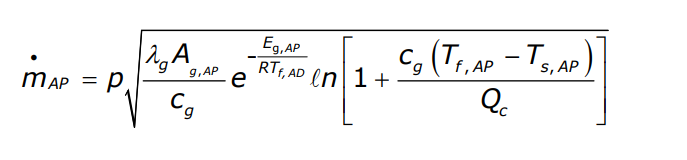

In [20]:
left = l_g*A_g_AP/c_g*np.exp(-E_g_AP/(R*T_f_AP(RM)))
right = np.log(1+c_g*(T_f_AP(RM)-T_s_AP)/Q_c(T_s_AP))
mdotAP_overp = np.sqrt(left*right)

## (e) Calculate $\dot{m_p}$

In [21]:
mdotp_overp = RM*mdotAP_overp

## Calculate $\nu_p$

In [22]:
rho_p = 0.97 #g/cm3

In [23]:
vp = mdotp_overp/rho_p

In [24]:
vp

array([ 0.04219996,  0.04629818,  0.05043585,  0.05461296,  0.05882949,
        0.06308544,  0.06738084,  0.07171571,  0.0760901 ,  0.08050406,
        0.08495767,  0.089451  ,  0.09398416,  0.09855725,  0.1031704 ,
        0.10782374,  0.11251742,  0.1172516 ,  0.12202647,  0.1268422 ,
        0.131699  ,  0.1365971 ,  0.14153671,  0.14651809,  0.15154149,
        0.15660718,  0.16171546,  0.16686663,  0.172061  ,  0.17729892,
        0.18258072,  0.18790678,  0.19327747,  0.19869321,  0.2041544 ,
        0.20966147,  0.21521489,  0.22081512,  0.22646265,  0.232158  ,
        0.2379017 ,  0.24369429,  0.24953635,  0.25542848,  0.26137129,
        0.26736544,  0.27341159,  0.27951042,  0.28566267,  0.29186908,
        0.29813043,  0.30444752,  0.31082119,  0.31725231,  0.32374178,
        0.33029055,  0.33689958,  0.34356989,  0.35030253,  0.3570986 ,
        0.36395923,  0.37088561,  0.37787896,  0.38494057,  0.39207176,
        0.39927394,  0.40654854,  0.41389706,  0.42132109,  0.42

## Plot

In [25]:
%matplotlib notebook

In [26]:
#from matplotlib import rc
#rc('text', usetex=True)

<IPython.core.display.Javascript object>


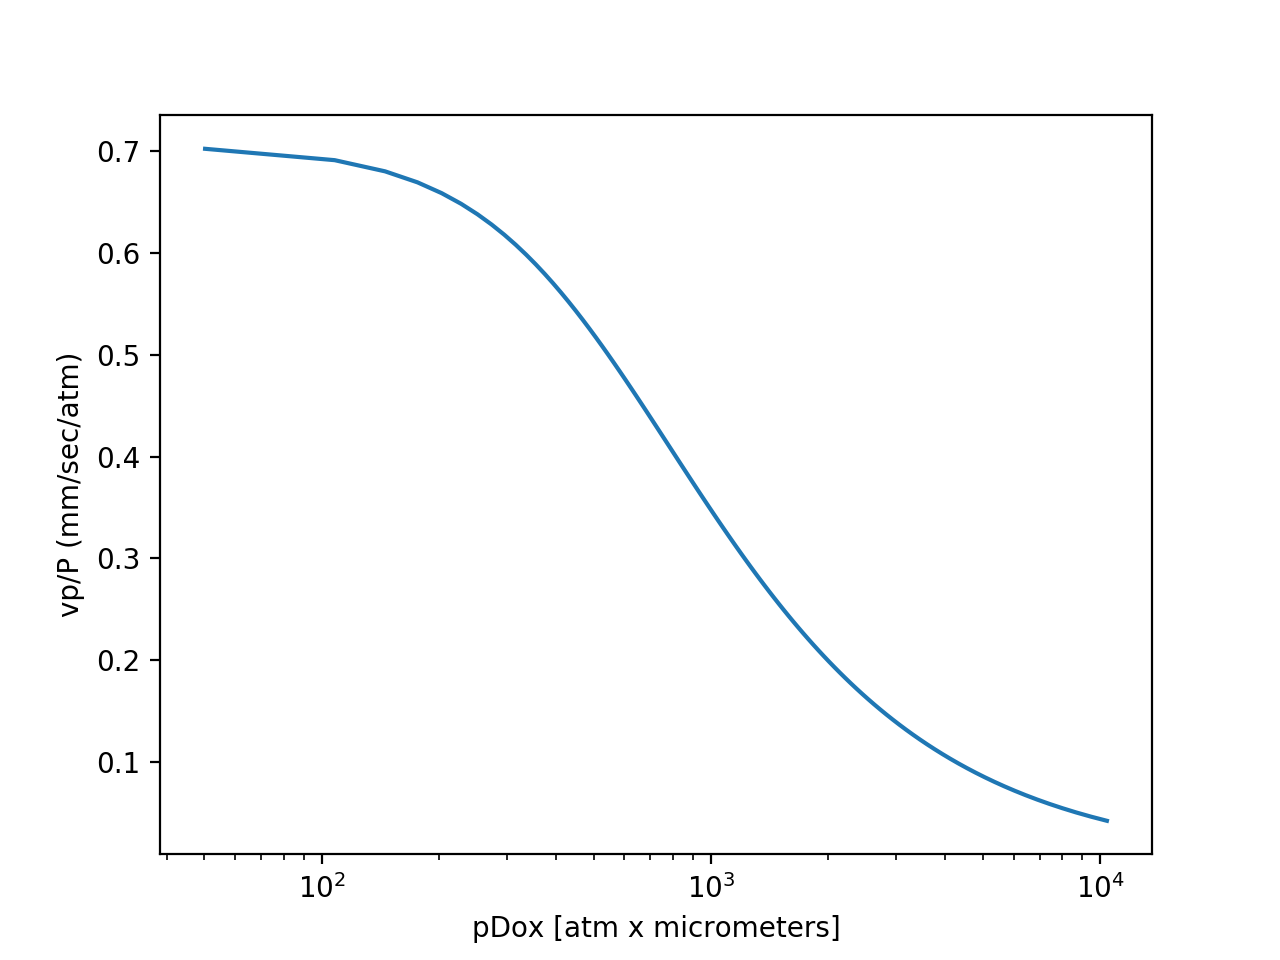

In [27]:
plt.figure()
plt.semilogx(pdox, vp)
plt.ylabel('vp/P (mm/sec/atm)')
plt.xlabel('pDox [atm x micrometers]');

Langelle et al:
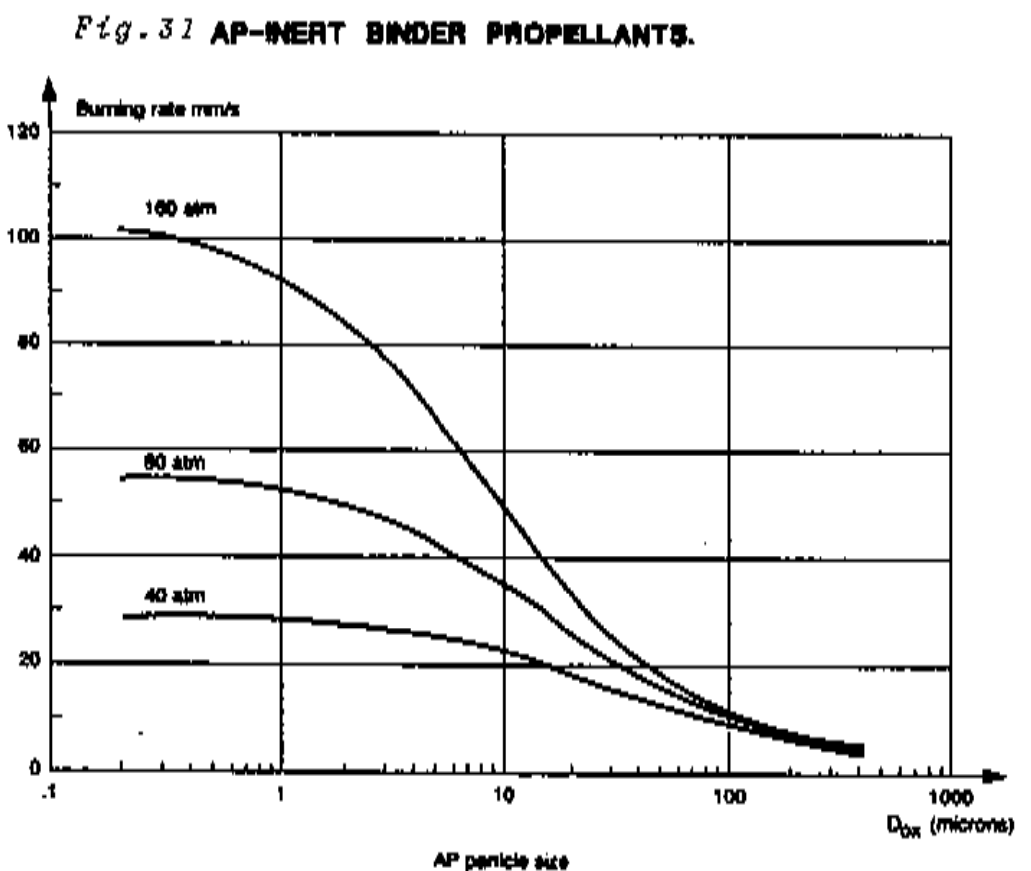

The tool http://arohatgi.info/WebPlotDigitizer/app3_12/ was used to extract points from the graph:

In [28]:
atm100 = np.array([[0.19443648423241974, 102.02743305029392],
            [0.3648104551109947, 99.95525800130632],
            [0.6737116177718332, 96.1606792945787],
            [1.0798529796135041, 91.91835401698236],
            [1.7859684200329142, 85.95950359242323],
            [2.5238859480442692, 80.8412802090137],
            [3.6802393228768513, 73.71979098628346],
            [5.118663699732799, 65.73220117570214],
            [7.581227849575002, 56.605486610058776],
            [11.770398038118921, 46.337687785760906],
            [17.848439902416832, 36.35369039843238],
            [26.855504267380724, 27.802416721097302],
            [39.47200526477474, 21.828870019595016],
            [66.31685751713934, 15.585238406270378],
            [95.21440226054132, 12.189418680600909],
            [145.5904057447149, 9.374918354016955],
            [226.16277797149257, 7.422599608099262],
            [392.2345853806221, 5.483997387328515]]).transpose()

In [29]:
atm60 = np.array([[0.20643825046238398, 55.583278902677975],
                [0.3813210875556298, 55.086218158066615],
                [0.5475845368975976, 54.55780535597647],
                [0.798813318504931, 54.031352057478756],
                [1.09418837571422, 53.06694970607445],
                [1.7679126767917654, 50.97615937295885],
                [2.518601008700199, 48.86969301110385],
                [3.6736033291979115, 46.192684519921585],
                [5.232941957760505, 42.50914435009794],
                [8.587257912930834, 37.122795558458506],
                [12.72261125574807, 32.87067276290003],
                [16.361021600950064, 29.174395819725646],
                [20.54973247568021, 25.905290659699517],
                [32.67737966521888, 20.515022860875234],
                [47.65972531131591, 16.834421946440216],
                [68.96856793167025, 13.582952318745896],
                [92.98812663205457, 11.326257348138455],
                [132.47384560344474, 9.363161332462425],
                [181.45322703881925, 7.9686479425212156],
                [240.83718740779642, 6.283474853037205],
                [380.0686237732098, 4.906596995427805]]).transpose()

In [30]:
atm40 = np.array([[0.19969697636738765, 29.199216198563008],
                [0.3631340302516808, 29.703788373612],
                [0.5339271902620518, 29.32168517308949],
                [1.1273784414517618, 28.841280209013732],
                [2.678415939833309, 27.228608752449375],
                [5.145582194456121, 25.732854343566302],
                [8.056604133403084, 24.21162638798168],
                [12.223220970195753, 22.112998040496393],
                [17.82865372264999, 19.435989549314172],
                [28.35442443922256, 16.196276943174382],
                [45.452776564561646, 13.674395819725675],
                [67.35026683683651, 11.429457870672735],
                [104.62214311553308, 9.333768778576058],
                [162.52193544833875, 7.3814500326583925],
                [244.64761498886514, 5.711952971913746],
                [362.5269526728438, 4.183866753755694]]).transpose()


<IPython.core.display.Javascript object>


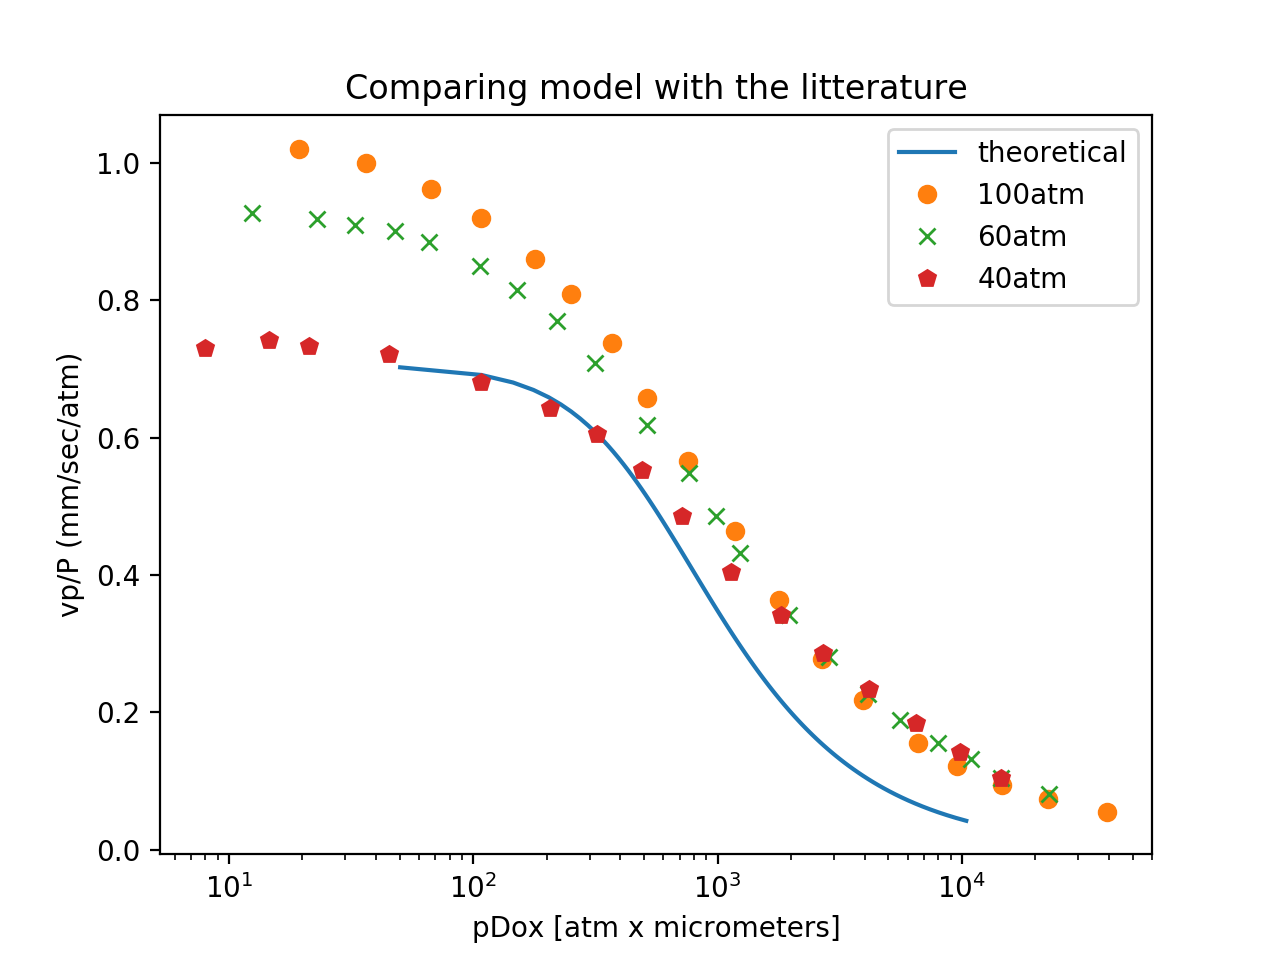

In [31]:
plt.figure()
plt.semilogx(pdox, vp)
plt.semilogx(atm100[0]*100.,atm100[1]/100., 'o')
plt.semilogx(atm60[0]*60., atm60[1]/60., 'x')
plt.semilogx(atm40[0]*40., atm40[1]/40., 'p')
plt.title('Comparing model with the litterature')
plt.ylabel('vp/P (mm/sec/atm)')
plt.xlabel('pDox [atm x micrometers]')
plt.legend(["theoretical", "100atm", "60atm", "40atm"]);